Aiden Rocha atx2xs

# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

ans_1 = A@e_1
ans_2 = A@e_2
ans_3 = A@e_3

print("Ans 1: ", ans_1)
print("Ans 2: ",ans_2)
print("Ans 3: ",ans_3)

Ans 1:  [1 4 7]
Ans 2:  [2 5 8]
Ans 3:  [3 6 9]


Above are the 3 multiplications. Multiplying $A$ times $e_1$ returns the first column of $A$ because [1,0,0] returns the first item of each row of $A$. Ans 2 is the second column for the same reason as multiplying $A$ by [0,1,0] selects the second item. Ans 3 is the third column because [0,0,1] returns the third item of each row of $A$. This is all because the zeros of each vector multiply the other items by zero so there is nothing to add at the end of the matrix multiplication.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)
ans = A@u

print(ans)

[ 6. 15. 24.]


This returns the sum of each row of $A$ as a vector. This is because in matrix multiplication you multiply each item of the vector by each item of the row, and then add them together. So in the first position it is 1+2+3=6, and second is 4+5+6=15, and third is 7+8+9=24.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [5]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
ans = A@x

print(ans)

[-2  4 11]


This multiplication returns the same vector because of the diagonal of ones. What happens is that in each row when multiplied by A, it multiplies that number by the corresponding number in the column. So the first row is $-2*1=2$, $4*0=0$, $11*0=0$. The second row is $-2*0=0$, $4*1=0$, $11*0=0$. The third row is $-2*0=0$, $4*0=0$, $11*1=11$. When summed and combined into a vector it simply returns the original vector.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [6]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

ans = A@x
print(ans)


[11 -2  4]


This is a reordering of the vector based on the order of the ones in the A matrix. The same thing that happens in the identity matrix happens in this matrix. The first row is $-2*0=0$, $4*0=0$, $11*1=11$. The second row is $-2*1=-2$, $4*1=0$, $11*0=0$. The third row is $-2*0=2$, $4*1=0$, $11*0=0$. This simply changes the order of the origninal vector.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [7]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [8]:
ans1 = A@e_1
ans2 = A@e_2
ans3 = A@e_3

print("Ans 1: ", ans1)
print("Ans 2: ",ans2)
print("Ans 3: ",ans3)

Ans 1:  [0.50052958 0.02574731 0.47372311]
Ans 2:  [0.24049286 0.39251588 0.36699127]
Ans 3:  [0.18358131 0.37907577 0.43734292]


These results are selecting the columns of the matrix based on the values in the e-vectors. By selecting a column it is shoing the probability that you transition to those states(the rows) from the current state(the column).

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [9]:
e_vectors = [e_1, e_2, e_3]
for e in e_vectors:
    ans = e
    for _ in range(5):
        ans = A @ ans
    print(f"{ans} ", e)

[0.29266551 0.27862515 0.42870935]  [1 0 0]
[0.29197422 0.27979983 0.42822595]  [0 1 0]
[0.29171646 0.2802254  0.42805814]  [0 0 1]


These are the probabilities that that columns(current state) gets transitioned to 5 times in a row. Because all of the states seem to roughly match then you can tell that this markov chain quickly converges to its steady state vector.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [10]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [11]:
next = T@[1,0]

print(next)

[0.25 0.75]


This means that if you start in state 1 you are 25% likely to stay in state one and 75% likely to transition to state 2.

In [12]:
next = T@next

print(next)

[0.4375 0.5625]


In [13]:
for _ in range(10):
    next = T@next
    print(next)

[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]


After the 3rd transition (first iteration of the loop), the states settle into what might be considered the steady state of about 0.4 and 0.6.

In [14]:
# change initial state
next = T@[0,1]
for _ in range(10):
    next = T@next
    print(next)

[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]


This run through shows how we similarly get the steady state of 0.4 and 0.6. Although we start at 0.5 and 0.5, the steady state is the same, it actually seems to approach that state quicker.

These numbers represent the forecast that we transition to state 1 after 2 transitions and the forecast that we transition to state 2 after 2 transitions. It is a forecast of transitions in a 2 transition period.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [15]:
import numpy as np
import pandas as pd

weather = pd.read_csv('cville_weather.csv')
weather.head()


,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [16]:
weather['STATION'].unique()
weather['STATION'].value_counts()

STATION
US1VACRC002    271
US1VAAB0010    140
Name: count, dtype: int64

In [17]:
weather= weather[weather['STATION'] == 'US1VACRC002']
weather.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [18]:
rain = (weather['PRCP'] > 0).astype(int)

rain

0      1
1      1
2      1
3      1
4      0
      ..
266    1
267    1
268    1
269    1
270    1
Name: PRCP, Length: 271, dtype: int64

In [19]:
S = [0,1]
T = len(rain)

tr_counts = np.zeros((len(S),len(S)))

for t in range(1,T):
    x_tm1 = rain[t-1]
    x_t = rain[t]
    index_from = [0,1].index(x_tm1)
    index_to = [0,1].index(x_t)
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')



Transition Counts:
 [[88. 42.]
 [42. 98.]]


In [20]:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')


State Counts: 
 [[130.]
 [140.]]


In [21]:
print(f'\nState proportions: \n {sums/np.sum(sums)}')



State proportions: 
 [[0.48148148]
 [0.51851852]]


In [22]:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

tr_pr_1 = tr_pr # Save transition matrix for later

print(f'\nTransition Proportions:')
pd.DataFrame(np.round(tr_pr,2), index=S, columns=S)


Transition Proportions:


,0,1
0,0.68,0.32
1,0.30,0.70


From this chain if it rained yesterday there is a 70% chance it will rain today. If it was clear yesterday there is only a 32% chance it will rain today.

In [23]:
tr_pr_1
clear = [1,0]
print("Day 0: ", clear)
for i in range(1,11):
    clear = np.matmul(tr_pr_1, clear)
    print("Day", i, ": ", clear)

Day 0:  [1, 0]
Day 1 :  [0.67692308 0.3       ]
Day 2 :  [0.55514793 0.41307692]
Day 3 :  [0.50924807 0.45569822]
Day 4 :  [0.49194735 0.47176318]
Day 5 :  [0.48542631 0.47781843]
Day 6 :  [0.48296838 0.48010079]
Day 7 :  [0.48204193 0.48096107]
Day 8 :  [0.48169273 0.48128533]
Day 9 :  [0.4815611  0.48140755]
Day 10 :  [0.48151149 0.48145361]


From a clear day it seemed to converge by day 6 to a steady state vector of [0.48, and 0.48], which is roughly 50 % rain and 50% clear which makes sense given longterm it would be hard to predict from one day.

In [24]:
tr_pr_1
rainy = [0,1]
print("Day 0: ", rainy)
for i in range(1,11):
    rainy = np.matmul(tr_pr_1, rainy)
    print("Day", i, ": ", rainy)

Day 0:  [0, 1]
Day 1 :  [0.32307692 0.7       ]
Day 2 :  [0.44485207 0.58692308]
Day 3 :  [0.49075193 0.54430178]
Day 4 :  [0.50805265 0.52823682]
Day 5 :  [0.51457369 0.52218157]
Day 6 :  [0.51703162 0.51989921]
Day 7 :  [0.51795807 0.51903893]
Day 8 :  [0.51830727 0.51871467]
Day 9 :  [0.5184389  0.51859245]
Day 10 :  [0.51848851 0.51854639]


This makes sense as well. The rainy converges to 0.51 and 0.51 which makes sense as it is the likelihood it stays raing after roughly 4 days.

np.float64(0.2559848484848485)

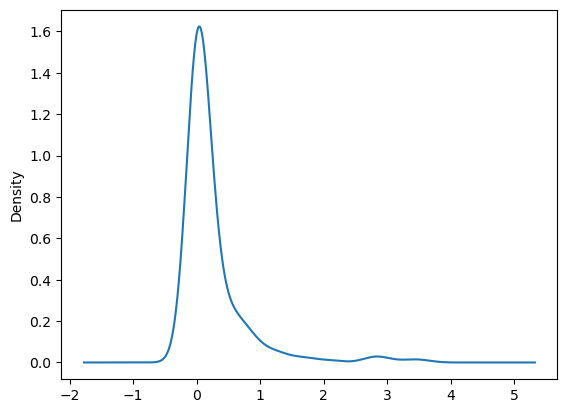

In [25]:
## KDE plotting
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

x = weather['PRCP']
x.plot.kde()
x.mean()

This just shows that the majority of the rainy days have rouhgly half an inch of rain.

One way to make the forecasting better would be to include more prior days in the predictions rather than just the day before. Similar to how in class we used more prior genes to imporve the fish gene prediction.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [27]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

len(data)

1000

In [28]:
states = set(data[0])

for i in range(1, len(data)):
    new_trip = data[i]
    new_states = set(new_trip)
    states = states.union(new_states)

In [29]:
states = sorted(list(states))

In [30]:
states

['Battery Park City',
 'Central Park',
 'Chelsea',
 'Chinatown',
 'Civic Center',
 'East Harlem',
 'East Village',
 'Ellis Island',
 'Financial District',
 'Flatiron District',
 'Governors Island',
 'Gramercy',
 'Greenwich Village',
 'Harlem',
 "Hell's Kitchen",
 'Inwood',
 'Kips Bay',
 'Liberty Island',
 'Little Italy',
 'Lower East Side',
 'Marble Hill',
 'Midtown',
 'Morningside Heights',
 'Murray Hill',
 'NoHo',
 'Nolita',
 'Outside Manhattan',
 "Randall's Island",
 'Roosevelt Island',
 'SoHo',
 'Stuyvesant Town',
 'Theater District',
 'Tribeca',
 'Two Bridges',
 'Upper East Side',
 'Upper West Side',
 'Washington Heights',
 'West Village']

In [31]:
tr_counts = np.zeros((len(states), len(states)))


for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

In [32]:
tr_counts

array([[6.00930e+04, 1.00500e+03, 1.64200e+04, ..., 5.38700e+03,
        1.42000e+02, 1.25610e+04],
       [6.05000e+02, 5.22680e+04, 1.09580e+04, ..., 6.09840e+04,
        7.76000e+02, 3.02800e+03],
       [1.62140e+04, 1.17050e+04, 6.62397e+05, ..., 6.61460e+04,
        2.48900e+03, 1.23919e+05],
       ...,
       [4.14500e+03, 8.18470e+04, 6.63150e+04, ..., 7.63963e+05,
        1.30390e+04, 2.07260e+04],
       [1.65000e+02, 9.23000e+02, 4.11000e+03, ..., 1.28010e+04,
        1.12340e+04, 1.41200e+03],
       [1.38660e+04, 3.24300e+03, 1.22544e+05, ..., 1.97780e+04,
        9.65000e+02, 2.42469e+05]], shape=(38, 38))

In [33]:
print('Transition Counts:\n', tr_counts)





Transition Counts:
 [[6.00930e+04 1.00500e+03 1.64200e+04 ... 5.38700e+03 1.42000e+02
  1.25610e+04]
 [6.05000e+02 5.22680e+04 1.09580e+04 ... 6.09840e+04 7.76000e+02
  3.02800e+03]
 [1.62140e+04 1.17050e+04 6.62397e+05 ... 6.61460e+04 2.48900e+03
  1.23919e+05]
 ...
 [4.14500e+03 8.18470e+04 6.63150e+04 ... 7.63963e+05 1.30390e+04
  2.07260e+04]
 [1.65000e+02 9.23000e+02 4.11000e+03 ... 1.28010e+04 1.12340e+04
  1.41200e+03]
 [1.38660e+04 3.24300e+03 1.22544e+05 ... 1.97780e+04 9.65000e+02
  2.42469e+05]]


In [34]:
# Sum the transition counts by row:
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)



State proportions: 



In [35]:
print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)


Transition Proportions:

                     Battery Park City  Central Park  Chelsea  Chinatown  \
Battery Park City                 0.26          0.00     0.01       0.01   
Central Park                      0.00          0.14     0.01       0.00   
Chelsea                           0.07          0.03     0.33       0.05   
Chinatown                         0.01          0.00     0.00       0.13   
Civic Center                      0.00          0.00     0.00       0.02   
East Harlem                       0.00          0.02     0.00       0.00   
East Village                      0.02          0.01     0.03       0.08   
Ellis Island                      0.00          0.00     0.00       0.00   
Financial District                0.09          0.00     0.01       0.06   
Flatiron District                 0.01          0.01     0.03       0.01   
Governors Island                  0.00          0.00     0.00       0.00   
Gramercy                          0.01          0.01     0.02  

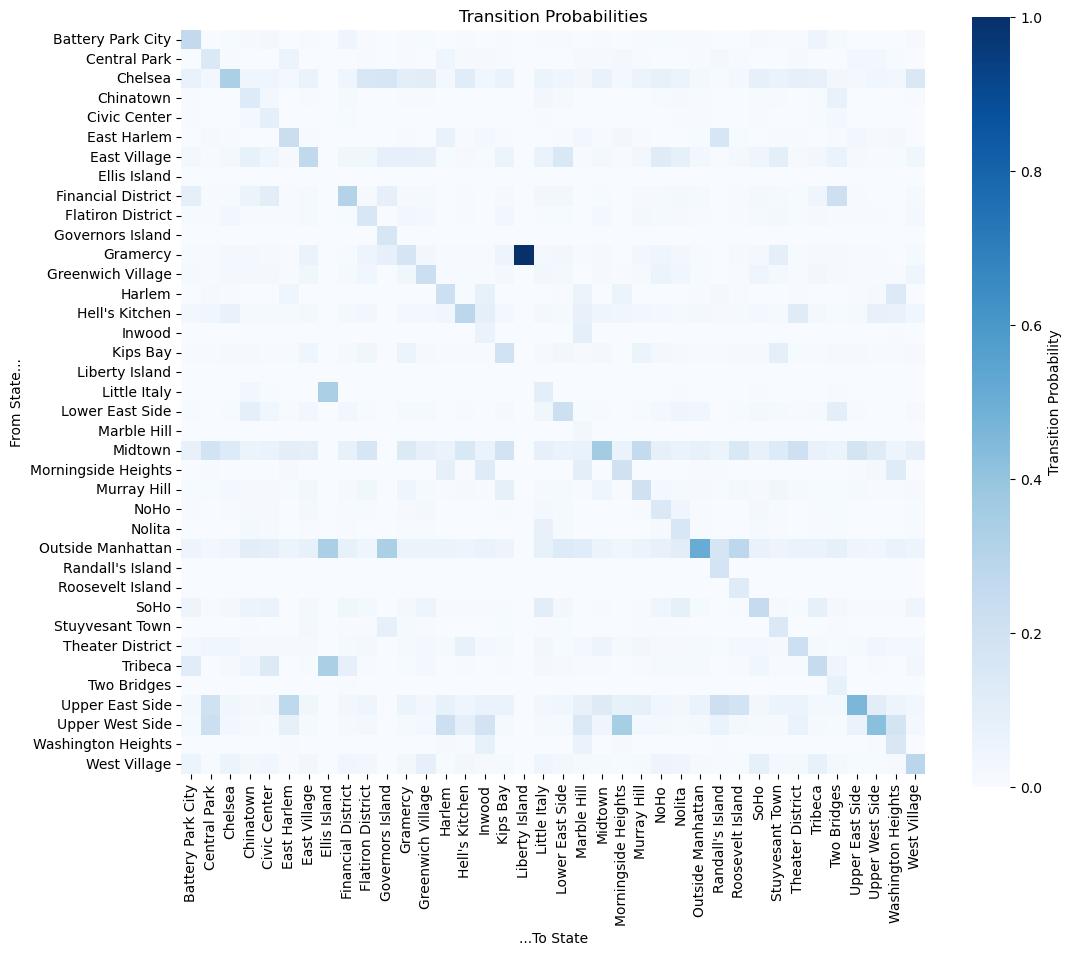

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Most common routes seem to be staying in the same neighborhoods but it is significant that you always go to Liberty Island from Granmarcy that is interesting.

Because cab location mostly depends on current neighborhood andhigher-order adds little predictive power and increases state space, the most likely order is 1.

In [41]:
tr_pr_1
hells = np.zeros(len(states))
hells[14] = 1
print("Trip 0: ", hells)
for i in range(1,11):
    hells = np.matmul(tr_pr, hells)
    if i == 2:
        hell_2 = hells
    if i == 3:
        hell_3 = hells
    if i == 5:
        hell_5 = hells
    if i == 10:
        hell_10 = hells
    print("Trip", i, ": ", hells)

Trip 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Trip 1 :  [6.74651954e-03 1.18619495e-02 1.14573217e-01 1.86060188e-03
 8.87012133e-04 5.61937705e-03 1.40459923e-02 0.00000000e+00
 9.02367408e-03 1.02039066e-02 0.00000000e+00 8.17586690e-03
 9.91150298e-03 8.76312447e-03 2.82865392e-01 1.21208656e-03
 8.61855620e-03 0.00000000e+00 7.39176778e-04 5.36127775e-03
 3.83881862e-05 1.50241560e-01 4.15000796e-03 1.36457751e-02
 2.67083764e-03 1.65069201e-03 5.28548151e-02 6.12577440e-05
 1.93574471e-04 1.08148505e-02 1.59188457e-03 7.84148129e-02
 8.53851274e-03 1.60903674e-04 4.53772864e-02 9.62065121e-02
 4.52408859e-03 2.83950063e-02]
Trip 2 :  [8.62277369e-03 1.55954791e-02 1.08679876e-01 3.06110359e-03
 1.67724988e-03 9.85676020e-03 2.49787213e-02 8.17980653e-08
 1.39957494e-02 1.56182211e-02 2.54979257e-07 1.52550503e-02
 1.69902516e-02 1.01955799e-02 1.19189523e-01 8.75535391e-04
 1.58420837e-02 1.94244550e-0

In [39]:
hells

array([9.96616633e-03, 1.61485315e-02, 8.61422005e-02, 4.59995464e-03,
       2.51648215e-03, 1.38154758e-02, 3.86248039e-02, 1.30418714e-07,
       1.91931393e-02, 1.72066447e-02, 5.21132769e-07, 2.18227265e-02,
       2.21913156e-02, 9.47439273e-03, 5.33850208e-02, 6.23978968e-04,
       2.20943799e-02, 4.34499613e-08, 1.67684760e-03, 1.61000326e-02,
       2.14881523e-05, 1.67837502e-01, 7.10533744e-03, 2.84892360e-02,
       7.57673690e-03, 4.62200330e-03, 1.02797035e-01, 1.56913008e-04,
       3.48670621e-04, 2.39323918e-02, 4.83861890e-03, 3.80982231e-02,
       1.77594064e-02, 4.51410166e-04, 1.21962680e-01, 7.87438499e-02,
       3.16371042e-03, 3.65119993e-02])

In [45]:
pd.DataFrame({
    "Final": np.round(hells,2),
    "Trip 2": np.round(hell_2,2),
    "Trip 3": np.round(hell_3,2),
    "Trip 5": np.round(hell_5,2),
    "Trip 10": np.round(hell_10,2)}, index=states)

,Final,Trip 2,Trip 3,Trip 5,Trip 10
Battery Park City,0.01,0.01,0.01,0.01,0.01
Central Park,0.02,0.02,0.02,0.02,0.02
Chelsea,0.09,0.11,0.10,0.09,0.09
Chinatown,0.00,0.00,0.00,0.00,0.00
Civic Center,0.00,0.00,0.00,0.00,0.00
East Harlem,0.01,0.01,0.01,0.01,0.01
East Village,0.04,0.02,0.03,0.04,0.04
Ellis Island,0.00,0.00,0.00,0.00,0.00
Financial District,0.02,0.01,0.02,0.02,0.02
Flatiron District,0.02,0.02,0.02,0.02,0.02


In [47]:
neigh = np.zeros(len(states))
neigh[0] = 1
v = neigh
max_iter = 1000
for i in range(1,max_iter):
    neigh = np.matmul(tr_pr, neigh)
    print("Trip", i, ": ", neigh)
    if np.linalg.norm(neigh - v, 1) < 1e-6:
            print(f"Converged after {i+1} iterations")
            break

print("end loop")
    

Trip 1 :  [2.62145833e-01 2.63921303e-03 7.07309093e-02 6.84014221e-03
 4.13985648e-03 1.86271730e-03 1.99271490e-02 0.00000000e+00
 9.14258294e-02 1.02340393e-02 0.00000000e+00 8.08340786e-03
 1.93207843e-02 1.26507732e-03 3.13259319e-02 1.26507732e-04
 7.59046393e-03 0.00000000e+00 2.07210941e-03 1.01293433e-02
 1.30870068e-05 7.43298362e-02 1.09930857e-03 1.15907257e-02
 4.67642376e-03 3.41570877e-03 5.41322224e-02 2.61740136e-05
 1.22145397e-04 5.32161319e-02 2.96638820e-03 2.29109865e-02
 1.17045826e-01 9.50989160e-04 2.43549196e-02 1.80818810e-02
 7.19785373e-04 6.04881454e-02]
Trip 2 :  [8.33945693e-02 6.55711333e-03 9.18586056e-02 8.21924104e-03
 4.88449031e-03 5.13968689e-03 3.60827571e-02 2.49241790e-07
 6.65608528e-02 1.55500262e-02 6.35292507e-07 1.66537872e-02
 2.72190599e-02 4.03701483e-03 4.26334695e-02 3.72516651e-04
 1.51493576e-02 3.78646616e-08 2.57831081e-03 1.75427347e-02
 1.51029349e-05 1.14586559e-01 2.54275763e-03 1.98693419e-02
 8.19795914e-03 5.84060079e-03 8.

In [50]:
df = pd.DataFrame(np.round(neigh,2), index=states)
df

,0
Battery Park City,0.01
Central Park,0.02
Chelsea,0.09
Chinatown,0.00
Civic Center,0.00
East Harlem,0.01
East Village,0.04
Ellis Island,0.00
Financial District,0.02
Flatiron District,0.02


Based on this dataframe the most time is spent in midtown at around 17% of the time, if this steady state vector is correct. It did not seem to converge based on the metric I used, but the markov chain way run 1000 times which feels like enough...